In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d threnjen/2019-airline-delays-and-cancellations

100% 752M/754M [00:30<00:00, 16.1MB/s]
100% 754M/754M [00:30<00:00, 25.7MB/s]


In [ ]:
! unzip 2019-airline-delays-and-cancellations

Archive:  2019-airline-delays-and-cancellations.zip
  inflating: full_data_flightdelay.csv  
  inflating: raw_data/AIRPORT_COORDINATES.csv  
  inflating: raw_data/B43_AIRCRAFT_INVENTORY.csv  
  inflating: raw_data/CARRIER_DECODE.csv  
  inflating: raw_data/GHCND_documentation.pdf  
  inflating: raw_data/ONTIME_REPORTING_01.csv  
  inflating: raw_data/ONTIME_REPORTING_02.csv  
  inflating: raw_data/ONTIME_REPORTING_03.csv  
  inflating: raw_data/ONTIME_REPORTING_04.csv  
  inflating: raw_data/ONTIME_REPORTING_05.csv  
  inflating: raw_data/ONTIME_REPORTING_06.csv  
  inflating: raw_data/ONTIME_REPORTING_07.csv  
  inflating: raw_data/ONTIME_REPORTING_08.csv  
  inflating: raw_data/ONTIME_REPORTING_09.csv  
  inflating: raw_data/ONTIME_REPORTING_10.csv  
  inflating: raw_data/ONTIME_REPORTING_11.csv  
  inflating: raw_data/ONTIME_REPORTING_12.csv  
  inflating: raw_data/ONTIME_REPORTING_2020_01.csv  
  inflating: raw_data/ONTIME_REPORTING_2020_02.csv  
  inflating: raw_data/ONTIME_REPORT

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

df = pd.read_csv('raw_data/ONTIME_REPORTING_2020_01.csv')
df.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(607346, 33)

In [ ]:
df.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,1,19,7,WN,N7747C,2876,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",800,757.0,0.0,0.0,0800-0859,1050,1034.0,0.0,1000-1059,0.0,NaN,110.0,97.0,584.0,3,NaN,NaN,NaN,NaN,NaN,NaN
1,1,19,7,WN,N444WN,2901,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",2000,1955.0,0.0,0.0,2000-2059,2245,2245.0,0.0,2200-2259,0.0,NaN,105.0,110.0,584.0,3,NaN,NaN,NaN,NaN,NaN,NaN
2,1,19,7,WN,N259WN,2186,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",1435,1429.0,0.0,0.0,1400-1459,1555,1545.0,0.0,1500-1559,0.0,NaN,80.0,76.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,19,7,WN,N908WN,2831,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",1110,1116.0,6.0,0.0,1100-1159,1230,1230.0,0.0,1200-1259,0.0,NaN,80.0,74.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN
4,1,19,7,WN,N414WN,2954,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",735,725.0,0.0,0.0,0700-0759,850,837.0,0.0,0800-0859,0.0,NaN,75.0,72.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN
5,1,19,7,WN,N925WN,2989,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",905,901.0,0.0,0.0,0900-0959,1025,1013.0,0.0,1000-1059,0.0,NaN,80.0,72.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN
6,1,19,7,WN,N262WN,3179,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",2000,2006.0,6.0,0.0,2000-2059,2120,2140.0,20.0,2100-2159,0.0,NaN,80.0,94.0,342.0,2,6.0,0.0,14.0,0.0,0.0,NaN
7,1,19,7,WN,N482WN,4093,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",1905,2059.0,114.0,1.0,1900-1959,2025,2232.0,127.0,2000-2059,0.0,NaN,80.0,93.0,342.0,2,114.0,0.0,13.0,0.0,0.0,NaN
8,1,19,7,WN,N7851A,4461,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",2055,2102.0,7.0,0.0,2000-2059,2225,2233.0,8.0,2200-2259,0.0,NaN,90.0,91.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN
9,1,19,7,WN,N438WN,4925,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",1800,1757.0,0.0,0.0,1800-1859,1920,1911.0,0.0,1900-1959,0.0,NaN,80.0,74.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.groupby(['DEST_CITY_NAME', 'DEST_AIRPORT_ID']).size().reset_index(name='counts')

,DEST_CITY_NAME,DEST_AIRPORT_ID,counts
0,"Aberdeen, SD",10141,62
1,"Abilene, TX",10136,168
2,"Adak Island, AK",10165,9
3,"Aguadilla, PR",10732,193
4,"Akron, OH",10874,487
...,...,...,...
345,"Wilmington, NC",12323,574
346,"Worcester, MA",13933,118
347,"Wrangell, AK",15841,62
348,"Yakutat, AK",15991,60


In [ ]:
len(df['DEST_CITY_NAME'].unique())

343

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482637 entries, 0 to 482636
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MONTH              482637 non-null  int64  
 1   DAY_OF_MONTH       482637 non-null  int64  
 2   DAY_OF_WEEK        482637 non-null  int64  
 3   ORIGIN_AIRPORT_ID  482637 non-null  int64  
 4   DEST_AIRPORT_ID    482637 non-null  int64  
 5   DEP_TIME           482637 non-null  float64
 6   DEP_DELAY_NEW      482637 non-null  float64
 7   DEP_DEL15          482637 non-null  float64
 8   DEP_TIME_BLK       482637 non-null  object 
 9   ARR_TIME           482637 non-null  float64
 10  ARR_DELAY_NEW      482011 non-null  float64
 11  ARR_TIME_BLK       482637 non-null  object 
 12  DISTANCE           482637 non-null  float64
 13  DISTANCE_GROUP     482637 non-null  int64  
 14  SEGMENT_NUMBER     482637 non-null  float64
 15  AIRLINE_ID         482637 non-null  int64  
 16  CA

In [ ]:
df = df.drop(['CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 32'], axis=1)

In [ ]:
passengers = pd.read_csv('raw_data/T3_AIR_CARRIER_SUMMARY_AIRPORT_ACTIVITY_2020.csv')
passengers.head()

,OP_UNIQUE_CARRIER,CARRIER_NAME,ORIGIN_AIRPORT_ID,SERVICE_CLASS,REV_ACRFT_DEP_PERF_510,REV_PAX_ENP_110
0,04Q,Tradewind Aviation,13535,K,20,105.0
1,04Q,Tradewind Aviation,15024,K,9,38.0
2,04Q,Tradewind Aviation,13987,K,1,2.0
3,04Q,Tradewind Aviation,14843,K,626,3553.0
4,04Q,Tradewind Aviation,12197,K,21,109.0


In [ ]:
aircraft = pd.read_csv("raw_data/B43_AIRCRAFT_INVENTORY.csv", encoding='latin1')
aircraft.drop_duplicates(subset='TAIL_NUM', inplace=True)
aircraft.head()

,MANUFACTURE_YEAR,TAIL_NUM,NUMBER_OF_SEATS
0,1944,N54514,0.0
1,1945,N1651M,0.0
2,1953,N100CE,0.0
3,1953,N141FL,0.0
4,1953,N151FL,0.0


In [ ]:
employees = pd.read_csv('raw_data/P10_EMPLOYEES.csv')
employees = employees[['OP_UNIQUE_CARRIER', 'PASS_GEN_SVC_ADMIN', 'PASSENGER_HANDLING']]
employees = employees.groupby('OP_UNIQUE_CARRIER').sum().reset_index()
employees.head()

,OP_UNIQUE_CARRIER,PASS_GEN_SVC_ADMIN,PASSENGER_HANDLING
0,0WQ,19,0
1,1BQ,41,0
2,2HQ,24,0
3,3EQ,32,0
4,5V,0,0


In [ ]:
employees.PASSENGER_HANDLING.value_counts()

0        33
296       1
17        1
9922      1
25893     1
12        1
2097      1
1425      1
5037      1
13841     1
1310      1
200       1
2579      1
21556     1
6127      1
1119      1
23        1
Name: PASSENGER_HANDLING, dtype: int64

In [ ]:
weather_report = pd.read_csv('raw_data/airport_weather_2019.csv')
weather_report.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/1/2019,4.70,NaN,0.14,0.0,0.0,64.0,66.0,57.0,310.0,310.0,15.0,19.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/2/2019,4.92,NaN,0.57,0.0,0.0,56.0,59.0,49.0,70.0,50.0,12.1,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/3/2019,5.37,NaN,0.15,0.0,0.0,52.0,55.0,51.0,340.0,330.0,15.0,18.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/4/2019,12.08,NaN,1.44,0.0,0.0,56.0,66.0,45.0,260.0,260.0,28.0,34.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/5/2019,13.42,NaN,0.00,0.0,0.0,49.0,59.0,44.0,280.0,330.0,23.9,33.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38675 entries, 0 to 38674
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  38675 non-null  object 
 1   NAME     38675 non-null  object 
 2   DATE     38675 non-null  object 
 3   AWND     38294 non-null  float64
 4   PGTM     3938 non-null   float64
 5   PRCP     38649 non-null  float64
 6   SNOW     26907 non-null  float64
 7   SNWD     26385 non-null  float64
 8   TAVG     28742 non-null  float64
 9   TMAX     38655 non-null  float64
 10  TMIN     38654 non-null  float64
 11  WDF2     38305 non-null  float64
 12  WDF5     38194 non-null  float64
 13  WSF2     38305 non-null  float64
 14  WSF5     38194 non-null  float64
 15  WT01     13851 non-null  float64
 16  WT02     1810 non-null   float64
 17  WT03     4783 non-null   float64
 18  WT04     266 non-null    float64
 19  WT05     119 non-null    float64
 20  WT06     406 non-null    float64
 21  WT07     25 

In [ ]:
weather_report.isna().sum() / len(weather_report) * 100

STATION     0.000000
NAME        0.000000
DATE        0.000000
AWND        0.985133
PGTM       89.817712
PRCP        0.067227
SNOW       30.427925
SNWD       31.777634
TAVG       25.683258
TMAX        0.051713
TMIN        0.054299
WDF2        0.956690
WDF5        1.243697
WSF2        0.956690
WSF5        1.243697
WT01       64.186167
WT02       95.319974
WT03       87.632838
WT04       99.312217
WT05       99.692308
WT06       98.950226
WT07       99.935359
WT08       87.782805
WT09       99.301875
WESD       99.984486
WT10       99.987072
PSUN       99.123465
TSUN       99.126050
SN32       99.056238
SX32       99.056238
TOBS       99.082094
WT11       99.997414
dtype: float64

In [ ]:
cities = pd.read_csv('raw_data/airports_list.csv')
cities.head()

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME
0,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US"
1,10257,Albany International,"Albany, NY","ALBANY INTERNATIONAL AIRPORT, NY US"
2,10140,Albuquerque International Sunport,"Albuquerque, NM","ALBUQUERQUE INTERNATIONAL AIRPORT, NM US"
3,10299,Anchorage International,"Anchorage, AK","ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A..."
4,10397,Atlanta Municipal,"Atlanta, GA",ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...


In [ ]:
cities.loc[cities.ORIGIN_AIRPORT_ID == 14843]

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME
68,14843,Puerto Rico International,"San Juan, PR","SAN JUAN L M MARIN INTERNATIONAL AIRPORT, US"


In [ ]:
names = pd.read_csv("raw_data/CARRIER_DECODE.csv")
names.drop_duplicates(inplace=True)
names.drop_duplicates(subset=['OP_UNIQUE_CARRIER'], inplace=True)
names

,AIRLINE_ID,OP_UNIQUE_CARRIER,CARRIER_NAME
0,21754,2PQ,21 Air LLC
3,20342,Q5,40-Mile Air
4,20342,WRB,40-Mile Air
6,19627,CIQ,A/S Conair
7,19072,AAE,AAA Airlines
...,...,...,...
2702,20379,ZKQ,Zantop International
2706,19771,ZAQ,Zas Airline Of Egypt
2707,21118,37,Zeal 320
2708,22069,ZG,ZIPAIR Tokyo Inc.


In [ ]:
weather_merge = pd.merge(cities, weather_report, how='left', on='NAME')
weather_merge.head()

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME,STATION,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-01,4.70,NaN,0.00,0.0,0.0,NaN,45.0,39.0,50.0,40.0,10.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-02,2.01,NaN,0.39,0.0,0.0,NaN,39.0,36.0,50.0,60.0,6.0,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-03,6.26,NaN,0.44,0.0,0.0,NaN,41.0,37.0,70.0,70.0,21.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-04,2.01,NaN,0.13,0.0,0.0,NaN,47.0,37.0,340.0,300.0,8.9,19.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-05,1.79,NaN,0.00,0.0,0.0,NaN,62.0,37.0,290.0,300.0,6.9,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather = weather_merge[['DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'WDF2', 'WSF2', 'AWND', 'ORIGIN_AIRPORT_ID']]

In [ ]:
weather.head()

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2,AWND,ORIGIN_AIRPORT_ID
0,2019-01-01,0.00,0.0,0.0,45.0,39.0,50.0,10.1,4.70,12992
1,2019-01-02,0.39,0.0,0.0,39.0,36.0,50.0,6.0,2.01,12992
2,2019-01-03,0.44,0.0,0.0,41.0,37.0,70.0,21.0,6.26,12992
3,2019-01-04,0.13,0.0,0.0,47.0,37.0,340.0,8.9,2.01,12992
4,2019-01-05,0.00,0.0,0.0,62.0,37.0,290.0,6.9,1.79,12992


In [ ]:
weather.fillna(method='ffill')

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2,AWND,ORIGIN_AIRPORT_ID
0,2019-01-01,0.00,0.0,0.0,45.0,39.0,50.0,10.1,4.70,12992
1,2019-01-02,0.39,0.0,0.0,39.0,36.0,50.0,6.0,2.01,12992
2,2019-01-03,0.44,0.0,0.0,41.0,37.0,70.0,21.0,6.26,12992
3,2019-01-04,0.13,0.0,0.0,47.0,37.0,340.0,8.9,2.01,12992
4,2019-01-05,0.00,0.0,0.0,62.0,37.0,290.0,6.9,1.79,12992
...,...,...,...,...,...,...,...,...,...,...
35020,2019-12-27,0.00,0.0,0.0,35.0,26.0,320.0,12.1,5.82,10713
35021,2019-12-28,0.00,0.0,0.0,39.0,24.0,300.0,13.0,2.24,10713
35022,2019-12-29,0.04,0.1,0.0,32.0,28.0,150.0,12.1,6.26,10713
35023,2019-12-30,0.00,0.0,0.0,34.0,29.0,140.0,10.1,2.46,10713


In [ ]:
weather.iloc[30080:30090]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2,AWND,ORIGIN_AIRPORT_ID
30080,6/14/2019,0.25,NaN,0.0,95.0,79.0,80.0,16.1,4.92,14635
30081,6/15/2019,0.76,NaN,0.0,96.0,77.0,150.0,21.9,4.47,14635
30082,6/16/2019,0.02,NaN,0.0,85.0,78.0,110.0,12.1,5.59,14635
30083,6/17/2019,0.65,NaN,0.0,90.0,78.0,220.0,21.0,6.26,14635
30084,6/18/2019,NaN,NaN,0.0,90.0,78.0,240.0,23.9,6.04,14635
30085,6/19/2019,NaN,NaN,0.0,NaN,NaN,230.0,21.0,7.61,14635
30086,6/20/2019,0.00,NaN,0.0,96.0,80.0,240.0,14.1,6.71,14635
30087,6/21/2019,0.00,NaN,0.0,96.0,NaN,340.0,12.1,2.91,14635
30088,6/22/2019,0.00,NaN,0.0,94.0,77.0,30.0,8.1,2.01,14635
30089,6/23/2019,0.00,NaN,0.0,95.0,78.0,250.0,14.1,3.58,14635


In [ ]:
cities.loc[cities.ORIGIN_AIRPORT_ID == 14843]

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME
68,14843,Puerto Rico International,"San Juan, PR","SAN JUAN L M MARIN INTERNATIONAL AIRPORT, US"


In [ ]:
weather = weather.drop([24807])

In [ ]:
weather.loc[weather.SNOW.isna()]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2,AWND,ORIGIN_AIRPORT_ID
4015,1/1/2019,0.00,NaN,NaN,53.0,41.0,240.0,28.0,5.82,11193
4016,1/2/2019,0.00,NaN,NaN,44.0,39.0,270.0,17.0,5.82,11193
4017,1/3/2019,0.00,NaN,NaN,43.0,31.0,280.0,15.0,3.80,11193
4018,1/4/2019,0.26,NaN,NaN,53.0,29.0,360.0,17.0,5.82,11193
4019,1/5/2019,0.00,NaN,NaN,52.0,35.0,220.0,14.1,6.93,11193
...,...,...,...,...,...,...,...,...,...,...
34655,2019-12-27,0.00,NaN,NaN,67.0,59.0,120.0,15.0,7.61,12191
34656,2019-12-28,0.03,NaN,NaN,78.0,63.0,170.0,23.9,11.41,12191
34657,2019-12-29,0.22,NaN,NaN,71.0,50.0,320.0,25.1,10.96,12191
34658,2019-12-30,0.00,NaN,NaN,63.0,42.0,340.0,17.0,6.49,12191


In [ ]:
weather[['SNOW', 'SNWD']] = weather[['SNOW', 'SNWD']].fillna(0)

In [ ]:
weather = weather.fillna(method='ffill')

In [ ]:
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['MONTH'] = pd.DatetimeIndex(weather['DATE']).month
weather['DAY_OF_MONTH'] = pd.DatetimeIndex(weather['DATE']).day
weather

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2,AWND,ORIGIN_AIRPORT_ID,MONTH,DAY_OF_MONTH
0,2019-01-01,0.00,0.0,0.0,45.0,39.0,50.0,10.1,4.70,12992,1,1
1,2019-01-02,0.39,0.0,0.0,39.0,36.0,50.0,6.0,2.01,12992,1,2
2,2019-01-03,0.44,0.0,0.0,41.0,37.0,70.0,21.0,6.26,12992,1,3
3,2019-01-04,0.13,0.0,0.0,47.0,37.0,340.0,8.9,2.01,12992,1,4
4,2019-01-05,0.00,0.0,0.0,62.0,37.0,290.0,6.9,1.79,12992,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
35020,2019-12-27,0.00,0.0,0.0,35.0,26.0,320.0,12.1,5.82,10713,12,27
35021,2019-12-28,0.00,0.0,0.0,39.0,24.0,300.0,13.0,2.24,10713,12,28
35022,2019-12-29,0.04,0.1,0.0,32.0,28.0,150.0,12.1,6.26,10713,12,29
35023,2019-12-30,0.00,0.0,0.0,34.0,29.0,140.0,10.1,2.46,10713,12,30


In [ ]:
df.drop(df.loc[df['DEP_TIME'].isna()].index, axis=0, inplace=True)
df.drop(df.loc[df['ARR_DELAY_NEW'].isna()].index, axis=0, inplace=True)
df.drop(df.loc[df['TAIL_NUM'].isna()].index, axis=0, inplace=True)
df.drop(df.loc[df['CANCELLED']==1].index, axis=0, inplace=True)

In [ ]:
df["SEGMENT_NUMBER"] = df.groupby(["TAIL_NUM", 'DAY_OF_MONTH'])["DEP_TIME"].rank("dense", ascending=True)

In [ ]:
df = pd.merge(df, names, how='left', on=['OP_UNIQUE_CARRIER'])

In [ ]:
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,DISPLAY_AIRPORT_NAME
0,1,29,3,UA,N842UA,1226,11648,FCA,"Kalispell, MT",11292,DEN,"Denver, CO",733,725.0,0.0,0.0,0700-0759,1000,952.0,0.0,1000-1059,0.0,147.0,147.0,752.0,4,1.0,19977,United Air Lines Inc.,NaN
1,1,14,2,WN,N7867A,1231,12889,LAS,"Las Vegas, NV",13198,MCI,"Kansas City, MO",530,530.0,0.0,0.0,0001-0559,1005,951.0,0.0,1000-1059,0.0,155.0,141.0,1139.0,5,1.0,19393,Southwest Airlines Co.,NaN
2,1,19,7,DL,N699DL,1623,13487,MSP,"Minneapolis, MN",13204,MCO,"Orlando, FL",845,842.0,0.0,0.0,0800-0859,1306,1323.0,17.0,1300-1359,0.0,201.0,221.0,1310.0,6,1.0,19790,Delta Air Lines Inc.,NaN
3,1,19,7,DL,N364DX,1622,11433,DTW,"Detroit, MI",12889,LAS,"Las Vegas, NV",835,832.0,0.0,0.0,0800-0859,1024,1010.0,0.0,1000-1059,0.0,289.0,278.0,1749.0,7,1.0,19790,Delta Air Lines Inc.,NaN
4,1,14,2,WN,N733SA,1469,12889,LAS,"Las Vegas, NV",13232,MDW,"Chicago, IL",550,546.0,0.0,0.0,0001-0559,1110,1052.0,0.0,1100-1159,0.0,200.0,186.0,1521.0,7,1.0,19393,Southwest Airlines Co.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600266,1,10,5,HA,N476HA,583,12173,HNL,"Honolulu, HI",12982,LIH,"Lihue, HI",2156,2212.0,16.0,1.0,2100-2159,2238,2254.0,16.0,2200-2259,0.0,42.0,42.0,102.0,1,13.0,19690,Hawaiian Airlines Inc.,Kahului Airport
600267,1,5,7,HA,N484HA,585,13830,OGG,"Kahului, HI",12173,HNL,"Honolulu, HI",2205,2157.0,0.0,0.0,2200-2259,2242,2243.0,1.0,2200-2259,0.0,37.0,46.0,100.0,1,14.0,19690,Hawaiian Airlines Inc.,Honolulu International
600268,1,3,5,HA,N489HA,585,13830,OGG,"Kahului, HI",12173,HNL,"Honolulu, HI",2205,2159.0,0.0,0.0,2200-2259,2242,2249.0,7.0,2200-2259,0.0,37.0,50.0,100.0,1,14.0,19690,Hawaiian Airlines Inc.,Honolulu International
600269,1,7,2,HA,N494HA,584,12982,LIH,"Lihue, HI",12173,HNL,"Honolulu, HI",2308,2302.0,0.0,0.0,2300-2359,2344,2337.0,0.0,2300-2359,0.0,36.0,35.0,102.0,1,14.0,19690,Hawaiian Airlines Inc.,Honolulu International


In [ ]:
import regex as re
df_weather_merge = pd.merge(df, weather, how='inner', on=['ORIGIN_AIRPORT_ID', 'MONTH', 'DAY_OF_MONTH'])
weather = weather.rename(columns={'ORIGIN_AIRPORT_ID': 'DEST_AIRPORT_ID'})
df_weather_merge = pd.merge(df_weather_merge, weather, how='inner', on=['DEST_AIRPORT_ID', 'MONTH', 'DAY_OF_MONTH'])
df_weather_merge



,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,DISPLAY_AIRPORT_NAME,DATE_x,PRCP_x,SNOW_x,SNWD_x,TMAX_x,TMIN_x,WDF2_x,WSF2_x,AWND_x,DATE_y,PRCP_y,SNOW_y,SNWD_y,TMAX_y,TMIN_y,WDF2_y,WSF2_y,AWND_y
0,1,14,2,WN,N7867A,1231,12889,LAS,"Las Vegas, NV",13198,MCI,"Kansas City, MO",530,530.0,0.0,0.0,0001-0559,1005,951.0,0.0,1000-1059,0.0,155.0,141.0,1139.0,5,1.0,19393,Southwest Airlines Co.,NaN,2019-01-14,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,2019-01-14,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.40
1,1,14,2,NK,N696NK,195,12889,LAS,"Las Vegas, NV",13198,MCI,"Kansas City, MO",940,936.0,0.0,0.0,0900-0959,1424,1410.0,0.0,1400-1459,0.0,164.0,154.0,1139.0,5,2.0,20416,Spirit Air Lines,Tampa International,2019-01-14,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,2019-01-14,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.40
2,1,14,2,WN,N432WN,1784,12889,LAS,"Las Vegas, NV",13198,MCI,"Kansas City, MO",930,928.0,0.0,0.0,0900-0959,1410,1351.0,0.0,1400-1459,0.0,160.0,143.0,1139.0,5,2.0,19393,Southwest Airlines Co.,San Diego International Lindbergh Fl,2019-01-14,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,2019-01-14,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.40
3,1,14,2,WN,N7880D,1502,12889,LAS,"Las Vegas, NV",13198,MCI,"Kansas City, MO",1945,1941.0,0.0,0.0,1900-1959,20,2357.0,0.0,0001-0559,0.0,155.0,136.0,1139.0,5,5.0,19393,Southwest Airlines Co.,Dallas Love Field,2019-01-14,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,2019-01-14,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.40
4,1,14,2,YV,N508MJ,6333,12264,IAD,"Washington, DC",13198,MCI,"Kansas City, MO",845,836.0,0.0,0.0,0800-0859,1044,1027.0,0.0,1000-1059,0.0,179.0,171.0,926.0,4,2.0,20378,Mesa Airlines Inc.,LaGuardia,2019-01-14,0.00,0.0,7.9,34.0,15.0,10.0,14.1,4.92,2019-01-14,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482632,1,10,5,G4,272NV,2429,11986,GRR,"Grand Rapids, MI",14761,SFB,"Sanford, FL",1642,1635.0,0.0,0.0,1600-1659,1921,1917.0,0.0,1900-1959,0.0,159.0,162.0,1001.0,5,3.0,20368,Allegiant Air,Charlotte County,2019-01-10,0.00,0.0,0.0,26.0,22.0,310.0,21.0,9.84,2019-01-10,0.0,0.0,0.0,60.0,33.0,330.0,17.0,7.83
482633,1,10,5,G4,248NV,1383,11193,CVG,"Cincinnati, OH",14761,SFB,"Sanford, FL",1357,1357.0,0.0,0.0,1300-1359,1602,1557.0,0.0,1600-1659,0.0,125.0,120.0,735.0,3,3.0,20368,Allegiant Air,Charlotte County,2019-01-10,0.00,0.0,0.0,29.0,23.0,330.0,14.1,6.71,2019-01-10,0.0,0.0,0.0,60.0,33.0,330.0,17.0,7.83
482634,1,10,5,G4,318NV,2140,13931,ORF,"Norfolk, VA",14761,SFB,"Sanford, FL",907,857.0,0.0,0.0,0900-0959,1107,1053.0,0.0,1100-1159,0.0,120.0,116.0,631.0,3,2.0,20368,Allegiant Air,Sanford NAS,2019-01-10,0.00,0.0,0.0,41.0,32.0,290.0,18.1,11.41,2019-01-10,0.0,0.0,0.0,60.0,33.0,330.0,17.0,7.83
482635,1,8,3,G4,275NV,2277,15412,TYS,"Knoxville, TN",14761,SFB,"Sanford, FL",1714,1802.0,48.0,1.0,1700-1759,1847,1938.0,51.0,1800-1859,0.0,93.0,96.0,511.0,3,4.0,20368,Allegiant Air,Sanford NAS,2019-01-08,0.00,0.0,0.0,65.0,47.0,230.0,25.9,13.87,2019-01-08,0.0,0.0,0.0,73.0,43.0,300.0,15.0,2.91


In [ ]:
df_weather_merge.drop(['DATE_x', 'DATE_y'], axis=1, inplace=True)
df_weather_merge = df_weather_merge.rename(columns=lambda x: re.sub('_x','_DEP', x))
df_weather_merge = df_weather_merge.rename(columns=lambda x: re.sub('_y','_ARR', x))
df_weather_merge

NameError: ignored

In [ ]:
df = df_weather_merge
df = df.drop(columns = ['OP_UNIQUE_CARRIER', 'ORIGIN',  'DEST', 'DISPLAY_AIRPORT_NAME',
                        'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CANCELLED',
                        'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DEST_CITY_NAME',
                        'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'ORIGIN_CITY_NAME'],
                    axis=1)
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR
0,1,14,2,12889,13198,530.0,0.0,0.0,0001-0559,951.0,0.0,1000-1059,1139.0,5,1.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.40
1,1,14,2,12889,13198,936.0,0.0,0.0,0900-0959,1410.0,0.0,1400-1459,1139.0,5,2.0,20416,Spirit Air Lines,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.40
2,1,14,2,12889,13198,928.0,0.0,0.0,0900-0959,1351.0,0.0,1400-1459,1139.0,5,2.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.40
3,1,14,2,12889,13198,1941.0,0.0,0.0,1900-1959,2357.0,0.0,0001-0559,1139.0,5,5.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.40
4,1,14,2,12264,13198,836.0,0.0,0.0,0800-0859,1027.0,0.0,1000-1059,926.0,4,2.0,20378,Mesa Airlines Inc.,0.00,0.0,7.9,34.0,15.0,10.0,14.1,4.92,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482632,1,10,5,11986,14761,1635.0,0.0,0.0,1600-1659,1917.0,0.0,1900-1959,1001.0,5,3.0,20368,Allegiant Air,0.00,0.0,0.0,26.0,22.0,310.0,21.0,9.84,0.0,0.0,0.0,60.0,33.0,330.0,17.0,7.83
482633,1,10,5,11193,14761,1357.0,0.0,0.0,1300-1359,1557.0,0.0,1600-1659,735.0,3,3.0,20368,Allegiant Air,0.00,0.0,0.0,29.0,23.0,330.0,14.1,6.71,0.0,0.0,0.0,60.0,33.0,330.0,17.0,7.83
482634,1,10,5,13931,14761,857.0,0.0,0.0,0900-0959,1053.0,0.0,1100-1159,631.0,3,2.0,20368,Allegiant Air,0.00,0.0,0.0,41.0,32.0,290.0,18.1,11.41,0.0,0.0,0.0,60.0,33.0,330.0,17.0,7.83
482635,1,8,3,15412,14761,1802.0,48.0,1.0,1700-1759,1938.0,51.0,1800-1859,511.0,3,4.0,20368,Allegiant Air,0.00,0.0,0.0,65.0,47.0,230.0,25.9,13.87,0.0,0.0,0.0,73.0,43.0,300.0,15.0,2.91


In [ ]:
df['ARR_DEL15'] = (df.ARR_DELAY_NEW >= 15).astype(int)
df.head(15)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15
0,1,14,2,12889,13198,530.0,0.0,0.0,0001-0559,951.0,0.0,1000-1059,1139.0,5,1.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
1,1,14,2,12889,13198,936.0,0.0,0.0,0900-0959,1410.0,0.0,1400-1459,1139.0,5,2.0,20416,Spirit Air Lines,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
2,1,14,2,12889,13198,928.0,0.0,0.0,0900-0959,1351.0,0.0,1400-1459,1139.0,5,2.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
3,1,14,2,12889,13198,1941.0,0.0,0.0,1900-1959,2357.0,0.0,0001-0559,1139.0,5,5.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
4,1,14,2,12264,13198,836.0,0.0,0.0,0800-0859,1027.0,0.0,1000-1059,926.0,4,2.0,20378,Mesa Airlines Inc.,0.00,0.0,7.9,34.0,15.0,10.0,14.1,4.92,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
5,1,14,2,12264,13198,1742.0,0.0,0.0,1700-1759,1943.0,0.0,1900-1959,926.0,4,6.0,20378,Mesa Airlines Inc.,0.00,0.0,7.9,34.0,15.0,10.0,14.1,4.92,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
6,1,14,2,12339,13198,659.0,0.0,0.0,0700-0759,741.0,0.0,0700-0759,451.0,2,1.0,19393,Southwest Airlines Co.,0.00,0.0,5.1,31.0,13.0,300.0,10.1,3.80,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
7,1,14,2,12339,13198,1608.0,0.0,0.0,1600-1659,1634.0,0.0,1600-1659,451.0,2,5.0,19393,Southwest Airlines Co.,0.00,0.0,5.1,31.0,13.0,300.0,10.1,3.80,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
8,1,14,2,12191,13198,834.0,0.0,0.0,0800-0859,1014.0,0.0,1000-1059,666.0,3,2.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,56.0,39.0,30.0,14.1,7.61,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
9,1,14,2,12191,13198,1414.0,0.0,0.0,1400-1459,1604.0,0.0,1600-1659,666.0,3,4.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,56.0,39.0,30.0,14.1,7.61,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0


In [ ]:
df.corr()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY_NEW,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,NaN,1.000000,-0.052173,-0.004452,-0.004258,-0.005890,-0.028552,-0.056871,0.009111,-0.028578,-0.020929,-0.020664,0.004359,0.000914,0.018888,0.083092,0.177451,-0.146040,-0.245666,0.039327,0.059123,0.060428,0.018587,0.083085,0.177205,-0.145858,-0.245575,0.039106,0.059053,0.060062,-0.053736
DAY_OF_WEEK,NaN,-0.052173,1.000000,0.003825,0.003277,0.007940,0.038491,0.059181,-0.002351,0.041151,0.019905,0.019799,-0.027446,0.004165,0.029057,0.011691,-0.055201,0.041241,0.054697,-0.028882,-0.111824,-0.092815,0.028818,0.012077,-0.055054,0.040809,0.054471,-0.029191,-0.111201,-0.092100,0.060877
ORIGIN_AIRPORT_ID,NaN,-0.004452,0.003825,1.000000,0.000860,-0.029450,0.005251,0.003480,-0.002410,0.008294,0.063730,0.069802,-0.012975,-0.026201,-0.005932,-0.019792,0.018626,0.129556,0.177821,-0.087982,-0.131330,-0.157018,-0.006484,-0.011538,-0.012068,0.011833,0.019571,-0.013115,-0.023213,-0.034268,0.011197
DEST_AIRPORT_ID,NaN,-0.004258,0.003277,0.000860,1.000000,0.039654,0.002926,0.010143,0.030555,0.002800,0.063228,0.069305,0.011899,-0.026007,-0.006195,-0.011469,-0.011813,0.011883,0.019640,-0.012400,-0.022840,-0.034322,-0.005589,-0.020112,0.017964,0.129710,0.177981,-0.087977,-0.131477,-0.157251,0.011096
DEP_TIME,NaN,-0.005890,0.007940,-0.029450,0.039654,1.000000,0.089626,0.157485,0.633935,0.073010,-0.011184,-0.012660,0.755795,0.000789,0.005687,-0.005404,-0.014023,0.031666,0.034481,-0.001989,-0.001989,0.004835,0.001735,0.007618,0.013194,-0.023796,-0.022806,-0.005106,-0.003292,-0.012400,0.116855
DEP_DELAY_NEW,NaN,-0.028552,0.038491,0.005251,0.002926,0.089626,1.000000,0.548395,0.017172,0.974600,0.008981,0.008385,0.018881,0.040987,0.005744,0.002735,-0.006638,-0.000418,0.010474,-0.006863,-0.003634,-0.001817,0.004091,-0.000577,-0.007290,-0.003697,0.004993,-0.000027,-0.007037,-0.005893,0.497907
DEP_DEL15,NaN,-0.056871,0.059181,0.003480,0.010143,0.157485,0.548395,1.000000,0.072294,0.484461,0.019076,0.018212,0.071309,0.024812,0.016158,0.001966,-0.010032,0.008788,0.023140,-0.011765,-0.005322,-0.003323,0.010322,0.000190,-0.009625,0.001134,0.013667,-0.003717,-0.010442,-0.011955,0.697577
ARR_TIME,NaN,0.009111,-0.002351,-0.002410,0.030555,0.633935,0.017172,0.072294,1.000000,0.008999,0.001778,0.006588,0.522667,-0.008583,0.003083,0.002962,-0.003000,0.007477,0.007813,-0.001082,0.007528,0.012153,0.001197,0.002338,-0.001084,-0.001819,-0.004525,-0.003867,-0.000390,-0.005457,0.047436
ARR_DELAY_NEW,NaN,-0.028578,0.041151,0.008294,0.002800,0.073010,0.974600,0.484461,0.008999,1.000000,0.005946,0.005287,0.006340,0.054206,0.002964,0.006588,-0.005658,-0.002312,0.010138,-0.007574,-0.010257,-0.007281,0.008790,-0.000772,-0.007955,-0.003030,0.007817,-0.003343,-0.002862,-0.001468,0.541641


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Freq')

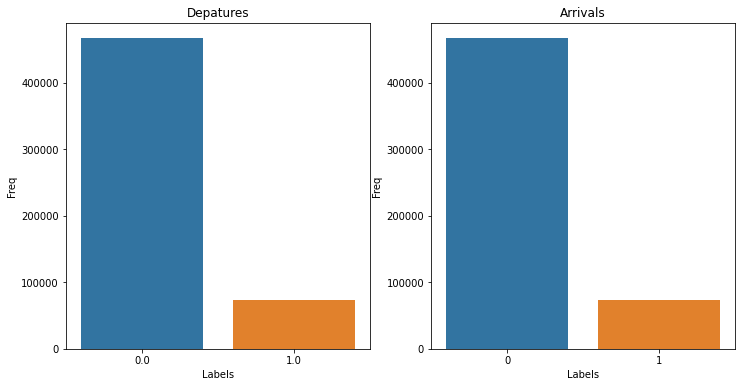

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, (ax,ax1) = plt.subplots(1,2, figsize=(12,6))
dep = sns.countplot(df['DEP_DEL15'], ax=ax)
dep.set_title('Depatures')
dep.set_xlabel('Labels')
dep.set_ylabel('Freq')

arr = sns.countplot(df['ARR_DEL15'], ax=ax1)
arr.set_title('Arrivals')
arr.set_xlabel('Labels')
arr.set_ylabel('Freq')

In [ ]:
def timeToBlock(t):
    block="Nan"
    if(t> 0 and t< 600): block="0001-0559"
    if(t>559 and t< 700): block= "0600-0659"
    if(t>659 and t< 800): block= "0700-0759"
    if(t>759 and t< 900): block= "0800-0859"
    if(t>859 and t< 1000): block= "0900-0959"
    if(t>959 and t< 1100): block= "1000-1059"
    if(t>1059 and t< 1200): block= "1100-1159"
    if(t>1159 and t< 1300): block= "1200-1259"
    if(t>1259 and t< 1400): block= "1300-1359"
    if(t>1359 and t< 1500): block= "1400-1459"
    if(t>1459 and t< 1600): block= "1500-1559"
    if(t>1559 and t< 1700): block= "1600-1659"
    if(t>1659 and t< 1800): block="1700-1759"
    if(t>1759 and t< 1900): block= "1800-1859"
    if(t>1859 and t< 2000): block= "1900-1959"
    if(t>1959 and t< 2100): block= "2000-2059"
    if(t>2059 and t< 2200): block= "2100-2159"
    if(t>2159 and t< 2300): block= "2200-2259"
    if(t>2259 and t< 2400): block="2300-2359"
    return block

In [ ]:
df['ARR_TIME_BLK']=df['ARR_TIME'].apply(timeToBlock)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15
0,1,14,2,12889,13198,530.0,0.0,0.0,0001-0559,951.0,0.0,0900-0959,1139.0,5,1.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
1,1,14,2,12889,13198,936.0,0.0,0.0,0900-0959,1410.0,0.0,1400-1459,1139.0,5,2.0,20416,Spirit Air Lines,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
2,1,14,2,12889,13198,928.0,0.0,0.0,0900-0959,1351.0,0.0,1300-1359,1139.0,5,2.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
3,1,14,2,12889,13198,1941.0,0.0,0.0,1900-1959,2357.0,0.0,2300-2359,1139.0,5,5.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
4,1,14,2,12264,13198,836.0,0.0,0.0,0800-0859,1027.0,0.0,1000-1059,926.0,4,2.0,20378,Mesa Airlines Inc.,0.00,0.0,7.9,34.0,15.0,10.0,14.1,4.92,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0


In [ ]:
delayArrPerTimeSlot= df[['ARR_TIME_BLK', 'ARR_DEL15']].groupby(['ARR_TIME_BLK']).mean()
delayArrPerTimeSlot

,ARR_DEL15
ARR_TIME_BLK,
0001-0559,0.311452
0600-0659,0.066718
0700-0759,0.038954
0800-0859,0.049670
0900-0959,0.077356
1000-1059,0.093795
1100-1159,0.104630
1200-1259,0.108048
1300-1359,0.105843


In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/airline.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
